In [3]:
import numpy as np

In [15]:
ak_af_ev = np.loadtxt('ak_af_vectors.txt',skiprows=1)
ak_md_ev = np.loadtxt('ak_md_eigenvectors_run1.txt', skiprows=1, max_rows=214)

In [16]:
ak_af_ev.shape

(214, 3)

In [17]:
ad_md_ev.shape

(214, 3)

In [4]:
from numpy import dot
from numpy.linalg import norm

cos_sim = dot(ak_af_ev.flatten(), ak_md_ev.flatten()) / (norm(ak_af_ev.flatten()) * norm(ak_md_ev.flatten()))


NameError: name 'ak_af_ev' is not defined

In [23]:
cos_sim

0.42474968714179084

In [5]:
# Generate random eigenvectors for comparison
np.random.seed(42)  # For reproducible results

# Create random vectors with same shape as your data
random_ev1 = np.random.randn(*ak_af_ev.shape)
random_ev2 = np.random.randn(*ak_md_ev.shape)

# Calculate cosine similarities between random vectors
cos_sim_random1_vs_random2 = dot(random_ev1.flatten(), random_ev2.flatten()) / (norm(random_ev1.flatten()) * norm(random_ev2.flatten()))
cos_sim_af_vs_random1 = dot(ak_af_ev.flatten(), random_ev1.flatten()) / (norm(ak_af_ev.flatten()) * norm(random_ev1.flatten()))
cos_sim_md_vs_random2 = dot(ak_md_ev.flatten(), random_ev2.flatten()) / (norm(ak_md_ev.flatten()) * norm(random_ev2.flatten()))

print(f"Your AF3 vs MD cosine similarity: {cos_sim:.3f}")
print(f"Random vector 1 vs Random vector 2: {cos_sim_random1_vs_random2:.3f}")
print(f"AF3 eigenvector vs Random vector: {cos_sim_af_vs_random1:.3f}")
print(f"MD eigenvector vs Random vector: {cos_sim_md_vs_random2:.3f}")
print(f"\nInterpretation:")
print(f"- Your AF3-MD similarity ({cos_sim:.3f}) is {'much higher than' if abs(cos_sim) > 0.2 else 'similar to'} random expectation")
print(f"- Random vectors typically have cosine similarity near 0")

NameError: name 'ak_af_ev' is not defined

In [26]:
! ls ../data

ak_af_eigen.txt        ak_rmsf3_250ns.xvg     hiv_rmsf3_100ns.xvg
ak_af_rmsd.txt         hiv_af_eigen.txt       lipa_af_eigen.txt
ak_af_rmsf.csv         hiv_af_rmsd.txt        lipa_af_rmsd.txt
ak_md_run1eigen.txt    hiv_af_rmsf.csv        lipa_af_rmsf.csv
ak_md_run2_eigen.txt   hiv_md_run1_eigen.txt  lipa_md_run1_eigen.txt
ak_md_run3_eigen.txt   hiv_md_run2_eigen.txt  lipa_md_run2_eigen.txt
ak_rmsd1_250ns.xvg     hiv_rmsd1_250ns.xvg    lipa_rmsd1_250ns.xvg
ak_rmsd2_236ns.xvg     hiv_rmsd2_135ns.xvg    lipa_rmsd2_250ns.xvg
ak_rmsd3_250ns.xvg     hiv_rmsd3_100ns.xvg    lipa_rmsf1_250ns.xvg
ak_rmsf1_250ns.xvg     hiv_rmsf1_250ns.xvg    lipa_rmsf2_250ns.xvg
ak_rmsf2_236ns.xvg     hiv_rmsf2_135ns.xvg


In [21]:
# Calculate pairwise cosine similarity between eigenvectors from two MD runs
import matplotlib.pyplot as plt
import seaborn as sns

def load_eigenvectors_properly(filename):
    """Load eigenvectors following the exact logic requested"""
    
    # Step 1: Open file and find lines starting with PC to count data rows between them
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    pc_line_indices = []
    for i, line in enumerate(lines):
        if line.strip().startswith('PC'):
            pc_line_indices.append(i)
    
    if len(pc_line_indices) < 2:
        print(f"Found only {len(pc_line_indices)} PC lines, cannot determine chunk size")
        return None
    
    # Step 2: Count data rows between PC lines
    data_rows_per_chunk = pc_line_indices[1] - pc_line_indices[0] - 1
    print(f"Data rows per eigenvector chunk: {data_rows_per_chunk}")
    
    # Step 3: Count total lines and calculate number of chunks
    total_lines = len(lines)
    chunk_size = data_rows_per_chunk + 1  # +1 for PC header line
    num_chunks = total_lines // chunk_size
    print(f"Total lines: {total_lines}")
    print(f"Chunk size (including header): {chunk_size}")
    print(f"Number of chunks: {num_chunks}")
    
    # Step 4: Load chunks in a for loop
    eigenvectors = []
    
    for chunk_idx in range(min(15, num_chunks)):  # Limit to first 15 eigenvectors
        start_line = chunk_idx * chunk_size
        pc_line = lines[start_line].strip()
        print(f"Loading chunk {chunk_idx + 1}: {pc_line}")
        
        # Load data for this chunk
        chunk_data = []
        for data_row in range(data_rows_per_chunk):
            line_idx = start_line + 1 + data_row
            if line_idx < len(lines):
                row = lines[line_idx].strip().split()
                # Take x, y, z coordinates (first 3 columns)
                coords = [float(x) for x in row[:3]]
                chunk_data.extend(coords)
        
        eigenvectors.append(chunk_data)
    
    return np.array(eigenvectors).T  # Transpose to have coordinates as rows, eigenvectors as columns

# Load both MD runs
print("Loading MD run 1...")
md_run1_ev = load_eigenvectors_properly('ak_md_run1_final_eigen.txt')



print("\nLoading AF...")
af_ev = load_eigenvectors_properly('ak_af_eigen.txt')


    
    

Loading MD run 1...
Data rows per eigenvector chunk: 215
Total lines: 2160
Chunk size (including header): 216
Number of chunks: 10
Loading chunk 1: PC1 atom displacements (eigenvalue=773.4980374763732) total=1405.408598589983:
Loading chunk 2: PC2 atom displacements (eigenvalue=230.2482179731604) total=1405.408598589983:
Loading chunk 3: PC3 atom displacements (eigenvalue=105.32148321036512) total=1405.408598589983:
Loading chunk 4: PC4 atom displacements (eigenvalue=64.63481141809727) total=1405.408598589983:
Loading chunk 5: PC5 atom displacements (eigenvalue=29.308933302558604) total=1405.408598589983:
Loading chunk 6: PC6 atom displacements (eigenvalue=24.517611375219794) total=1405.408598589983:
Loading chunk 7: PC7 atom displacements (eigenvalue=17.04090103561795) total=1405.408598589983:
Loading chunk 8: PC8 atom displacements (eigenvalue=14.027340122305034) total=1405.408598589983:
Loading chunk 9: PC9 atom displacements (eigenvalue=11.585256003462714) total=1405.408598589983:


MD Run 1 shape: (642, 10)
MD Run 2 shape: (642, 10)
Comparing first 10 eigenvectors


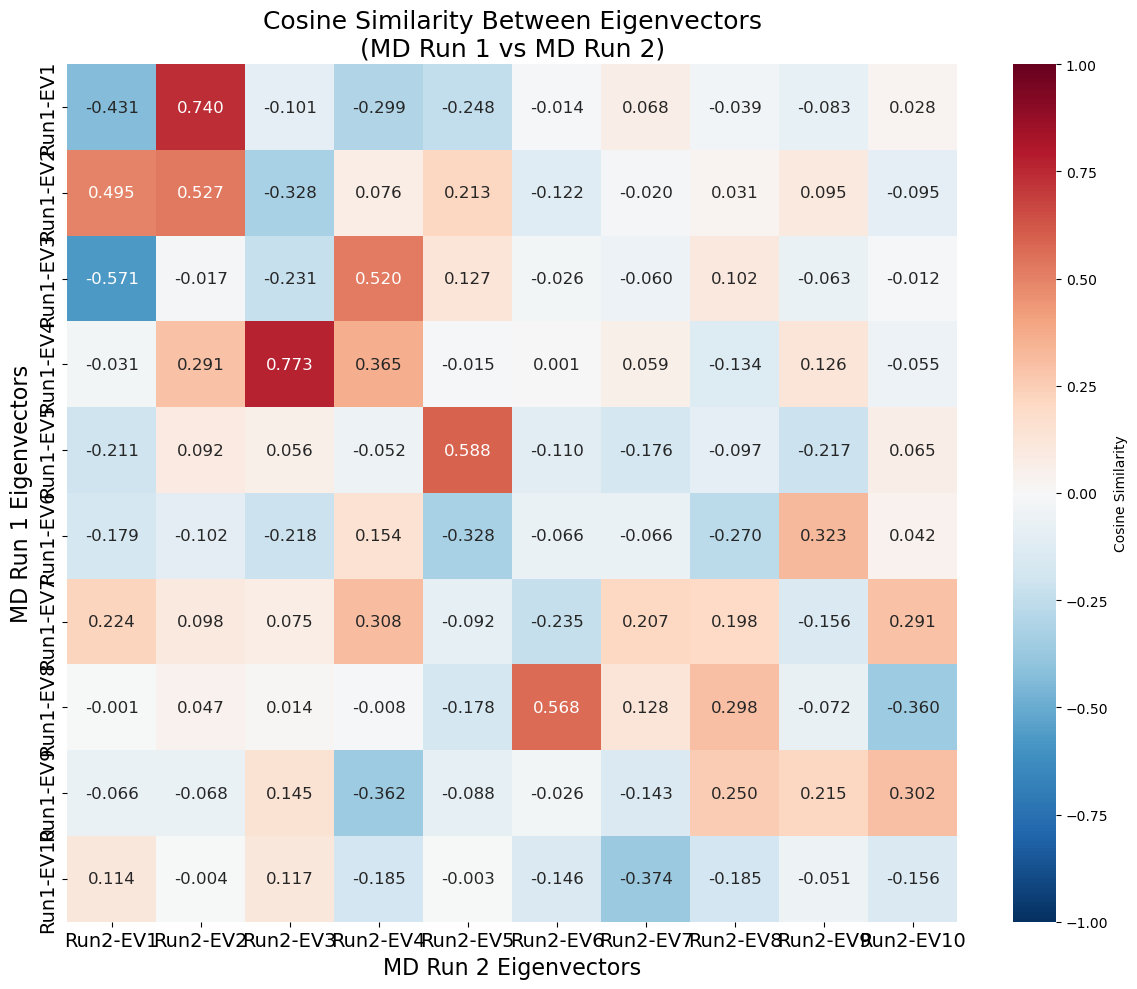


=== SIMILARITY ANALYSIS ===
Diagonal similarities (same mode comparison):
  EV1: -0.431
  EV2: 0.527
  EV3: -0.231
  EV4: 0.365
  EV5: 0.588
  EV6: -0.066
  EV7: 0.207
  EV8: 0.298
  EV9: 0.215
  EV10: -0.156

Summary Statistics:
  Mean diagonal similarity: 0.131
  Std diagonal similarity: 0.321
  Maximum off-diagonal similarity: 0.740
  Mean absolute off-diagonal similarity: 0.148


In [7]:
from numpy import dot
from numpy.linalg import norm
# Calculate pairwise cosine similarities and create heatmap
if md_run1_ev is not None and md_run2_ev is not None:
    print(f"MD Run 1 shape: {md_run1_ev.shape}")
    print(f"MD Run 2 shape: {md_run2_ev.shape}")
    
    # Determine number of eigenvectors to compare (minimum of both runs, up to 15)
    n_evs = min(md_run1_ev.shape[1], md_run2_ev.shape[1], 15)
    print(f"Comparing first {n_evs} eigenvectors")
    
    # Calculate pairwise cosine similarities
    cos_sim_matrix = np.zeros((n_evs, n_evs))
    
    for i in range(n_evs):
        for j in range(n_evs):
            vec1 = md_run1_ev[:, i]
            vec2 = md_run2_ev[:, j]
            cos_sim_matrix[i, j] = dot(vec1, vec2) / (norm(vec1) * norm(vec2))
    
    # Create heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(cos_sim_matrix, 
                annot=True, 
                fmt='.3f', 
                cmap='RdBu_r', 
                center=0,
                vmin=-1, 
                vmax=1,
                xticklabels=[f'Run2-EV{i+1}' for i in range(n_evs)],
                yticklabels=[f'Run1-EV{i+1}' for i in range(n_evs)],
                cbar_kws={'label': 'Cosine Similarity'},
                annot_kws={'size': 12})
    
    plt.title('Cosine Similarity Between Eigenvectors\n(MD Run 1 vs MD Run 2)', fontsize=18)
    plt.xlabel('MD Run 2 Eigenvectors', fontsize=16)
    plt.ylabel('MD Run 1 Eigenvectors', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n=== SIMILARITY ANALYSIS ===")
    print(f"Diagonal similarities (same mode comparison):")
    for i in range(n_evs):
        print(f"  EV{i+1}: {cos_sim_matrix[i, i]:.3f}")
    
    diagonal_vals = np.diag(cos_sim_matrix)
    off_diagonal_vals = cos_sim_matrix[np.triu_indices_from(cos_sim_matrix, k=1)]
    
    print(f"\nSummary Statistics:")
    print(f"  Mean diagonal similarity: {np.mean(diagonal_vals):.3f}")
    print(f"  Std diagonal similarity: {np.std(diagonal_vals):.3f}")
    print(f"  Maximum off-diagonal similarity: {np.max(np.abs(off_diagonal_vals)):.3f}")
    print(f"  Mean absolute off-diagonal similarity: {np.mean(np.abs(off_diagonal_vals)):.3f}")



MD Run 1 shape: (642, 10)
AlphaFold shape: (642, 11)
Comparing 4 MD eigenvectors vs 4 AF eigenvectors

=== MD vs AlphaFold SIMILARITY ANALYSIS ===
Diagonal similarities (same mode comparison):
  EV1: -0.395
  EV2: -0.129
  EV3: -0.449
  EV4: 0.185

Summary Statistics (MD vs AF):
  Mean diagonal similarity: -0.197
  Std diagonal similarity: 0.252
  Maximum off-diagonal similarity: 0.525
  Mean absolute off-diagonal similarity: 0.225

Comparison with original calculation:
  New EV1 vs EV1 similarity: -0.395


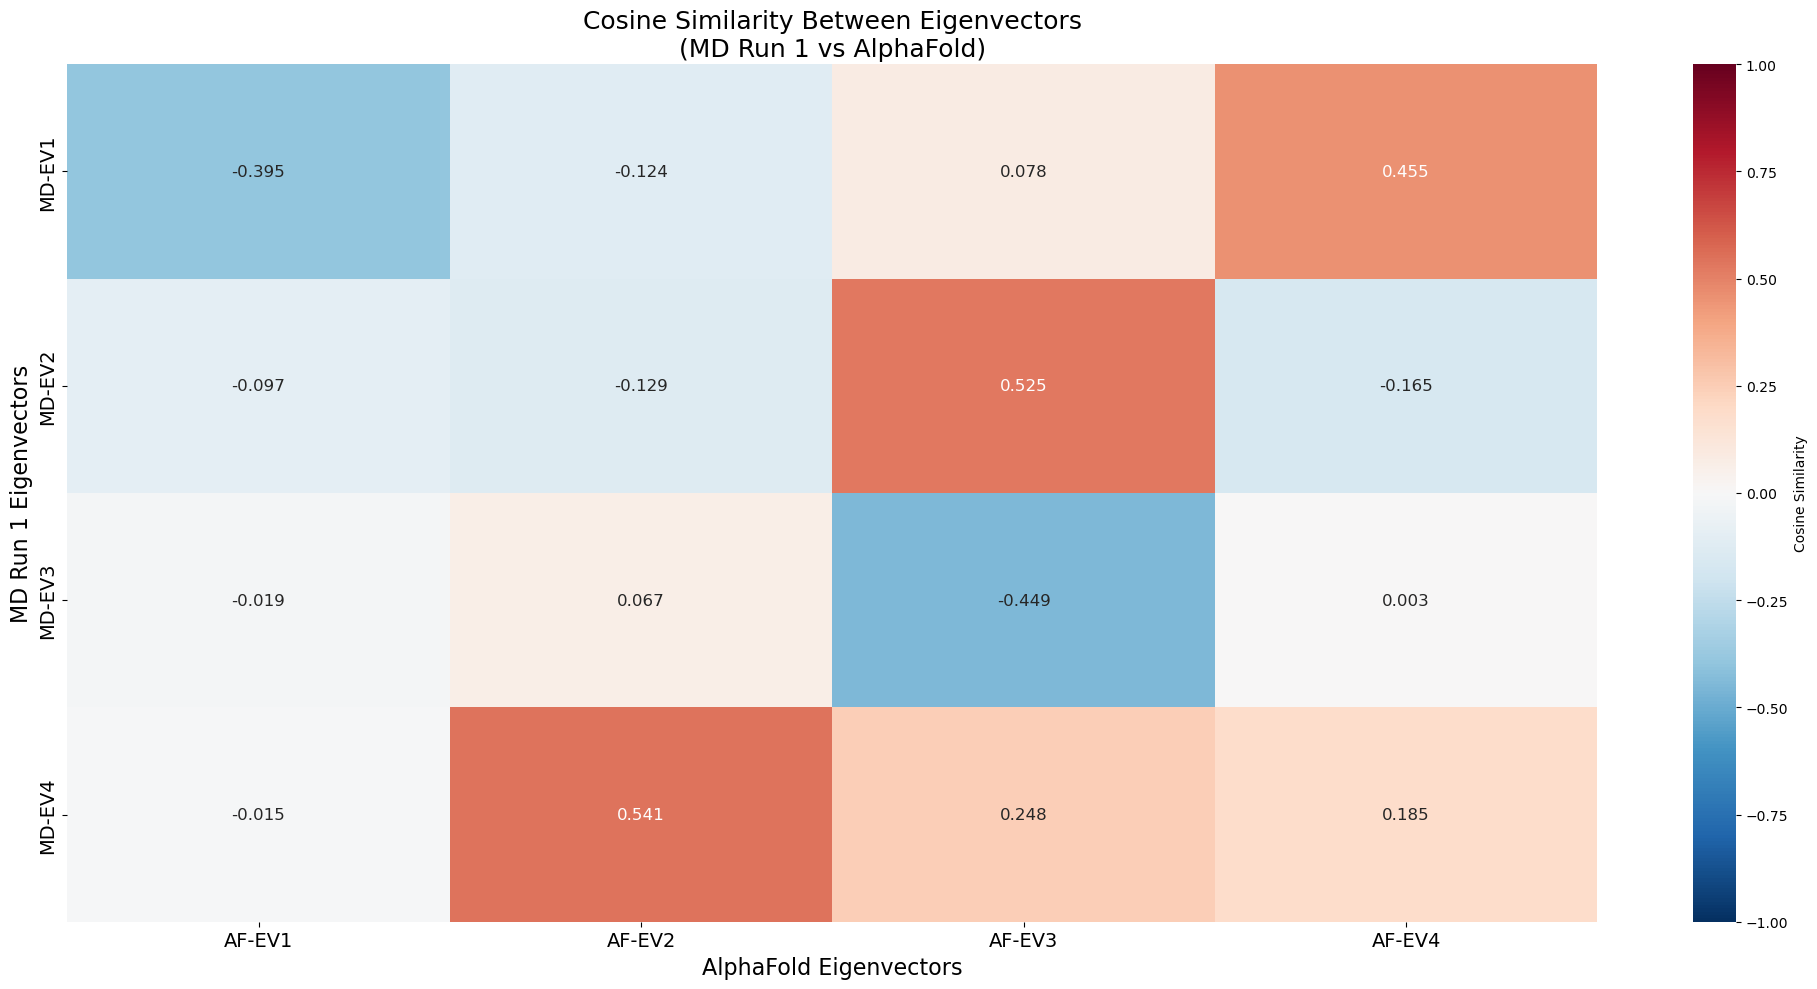

In [9]:
# Compare MD Run 1 eigenvectors with AlphaFold eigenvectors
if md_run1_ev is not None and af_ev is not None:
    print(f"MD Run 1 shape: {md_run1_ev.shape}")
    print(f"AlphaFold shape: {af_ev.shape}")
    
    # Use all available eigenvectors from both datasets (up to 15 each)
    n_evs_md = min(md_run1_ev.shape[1], 4)
    n_evs_af = min(af_ev.shape[1], 4)
    print(f"Comparing {n_evs_md} MD eigenvectors vs {n_evs_af} AF eigenvectors")
    
    # Calculate pairwise cosine similarities
    cos_sim_matrix_af = np.zeros((n_evs_md, n_evs_af))
    
    for i in range(n_evs_md):
        for j in range(n_evs_af):
            vec_md = md_run1_ev[:, i]
            vec_af = af_ev[:, j]
            cos_sim_matrix_af[i, j] = dot(vec_md, vec_af) / (norm(vec_md) * norm(vec_af))
    
    # Create heatmap
    plt.figure(figsize=(20, 10))
    sns.heatmap(cos_sim_matrix_af, 
                annot=True, 
                fmt='.3f', 
                cmap='RdBu_r', 
                center=0,
                vmin=-1, 
                vmax=1,
                xticklabels=[f'AF-EV{i+1}' for i in range(n_evs_af)],
                yticklabels=[f'MD-EV{i+1}' for i in range(n_evs_md)],
                cbar_kws={'label': 'Cosine Similarity'},
                annot_kws={'size': 12})
    
    plt.title('Cosine Similarity Between Eigenvectors\n(MD Run 1 vs AlphaFold)', fontsize=18)
    plt.xlabel('AlphaFold Eigenvectors', fontsize=16)
    plt.ylabel('MD Run 1 Eigenvectors', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    
    # Print summary statistics
    print(f"\n=== MD vs AlphaFold SIMILARITY ANALYSIS ===")
    print(f"Diagonal similarities (same mode comparison):")
    min_evs = min(n_evs_md, n_evs_af)
    for i in range(min_evs):
        print(f"  EV{i+1}: {cos_sim_matrix_af[i, i]:.3f}")
    
    # For non-square matrices, only extract diagonal if it exists
    if n_evs_md == n_evs_af:
        diagonal_vals_af = np.diag(cos_sim_matrix_af)
        off_diagonal_vals_af = cos_sim_matrix_af[np.triu_indices_from(cos_sim_matrix_af, k=1)]
    else:
        diagonal_vals_af = np.array([cos_sim_matrix_af[i, i] for i in range(min_evs)])
        # For rectangular matrix, get upper triangle excluding diagonal
        off_diagonal_vals_af = []
        for i in range(n_evs_md):
            for j in range(n_evs_af):
                if i != j:
                    off_diagonal_vals_af.append(cos_sim_matrix_af[i, j])
        off_diagonal_vals_af = np.array(off_diagonal_vals_af)
    
    print(f"\nSummary Statistics (MD vs AF):")
    print(f"  Mean diagonal similarity: {np.mean(diagonal_vals_af):.3f}")
    print(f"  Std diagonal similarity: {np.std(diagonal_vals_af):.3f}")
    print(f"  Maximum off-diagonal similarity: {np.max(np.abs(off_diagonal_vals_af)):.3f}")
    print(f"  Mean absolute off-diagonal similarity: {np.mean(np.abs(off_diagonal_vals_af)):.3f}")
    
    # Compare with the original single eigenvector similarity
    print(f"\nComparison with original calculation:")
    print(f"  New EV1 vs EV1 similarity: {cos_sim_matrix_af[0, 0]:.3f}")

plt.savefig('./evs.pdf',bbox_inches='tight')


In [50]:
! open .

=== CUMULATIVE AF3 EIGENVECTOR ANALYSIS ===
MD Run 1 shape: (642, 10)
AlphaFold shape: (642, 11)
[ 1.03855342e-03  7.58546451e-03  5.20072146e-03  1.49940124e-03
  1.06150891e-02  2.25960349e-04  1.19777568e-03  2.74138910e-03
 -4.62017278e-03  1.41586167e-04  1.62695887e-03 -1.27094716e-02
  1.60944254e-03 -7.02917239e-03 -1.71241101e-02  4.77829381e-03
 -1.49532652e-02 -1.27665055e-02  1.23248120e-02 -1.50804816e-02
 -9.66829732e-03 -3.45081710e-03 -1.01622776e-02 -7.18427050e-03
 -1.76315665e-02 -2.04701321e-02 -1.13955700e-02 -1.37388491e-02
 -2.39000320e-02 -1.58295253e-02  9.03320925e-04 -2.01119806e-02
 -1.49310288e-02  4.55636749e-03 -2.43264507e-02 -2.97839004e-02
  5.48855551e-04 -1.81675397e-02 -2.14363943e-02 -1.93040257e-03
 -1.92640012e-02 -3.31316488e-02  4.20803631e-03 -2.95834567e-02
 -2.97658096e-02  6.27655733e-03 -2.46759352e-02 -1.82626894e-02
  1.47205284e-03 -1.53496809e-02 -2.09982319e-02  1.75159267e-03
 -1.93262545e-02 -2.55633975e-02  4.22785461e-03 -2.472534

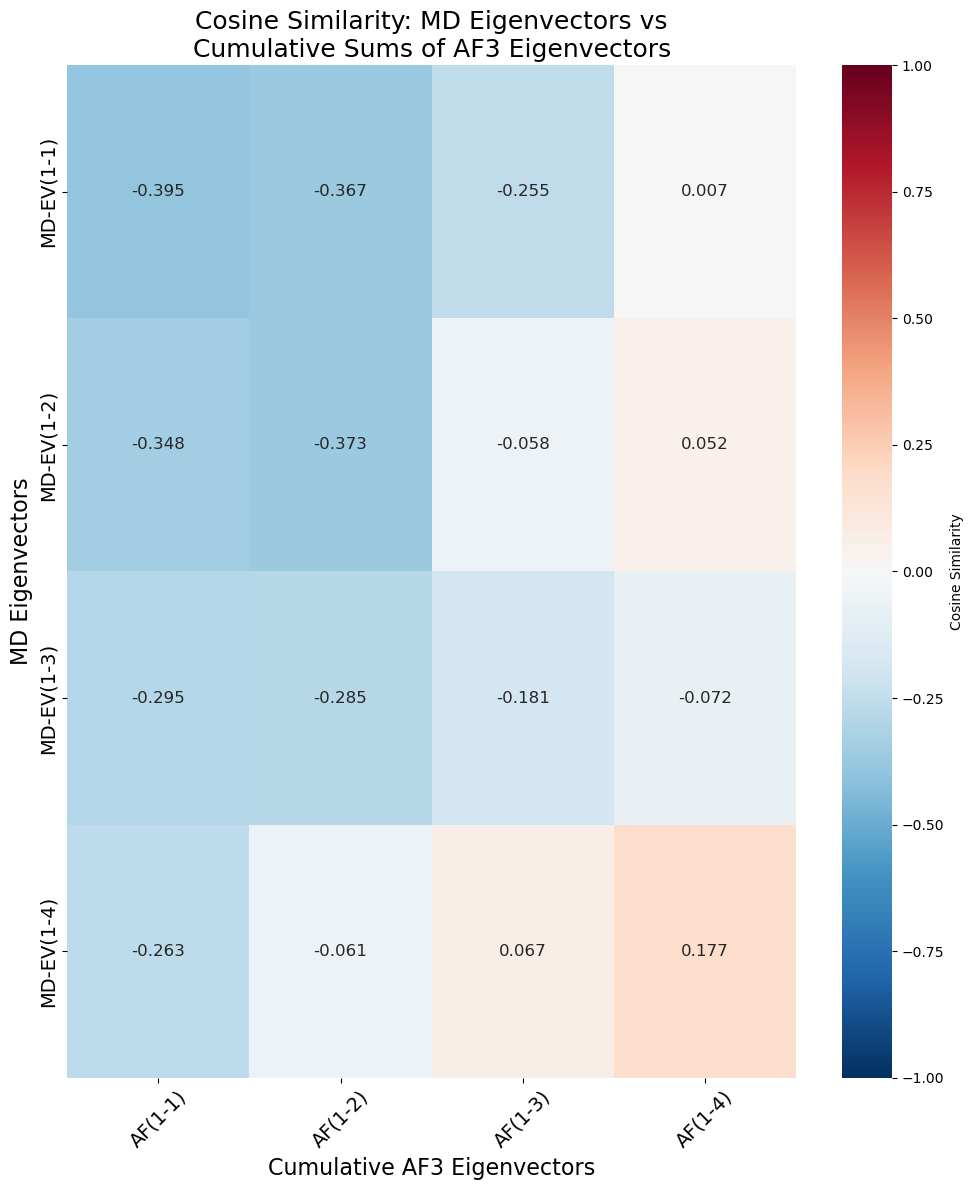


=== CUMULATIVE SIMILARITY ANALYSIS ===
Maximum similarity for each cumulative AF combination:
  AF(1-1): -0.395 (with MD-EV1)
  AF(1-2): -0.373 (with MD-EV2)
  AF(1-3): -0.255 (with MD-EV1)
  AF(1-4): 0.177 (with MD-EV4)

Similarity progression for MD-EV1:
  MD-EV1 vs AF(1-1): -0.395
  MD-EV1 vs AF(1-2): -0.367
  MD-EV1 vs AF(1-3): -0.255
  MD-EV1 vs AF(1-4): 0.007

Best cumulative combination overall: AF(1-1)
Mean absolute similarity: 0.325


In [22]:
# Calculate cosine similarity with cumulative sums of AF3 eigenvectors
if md_run1_ev is not None and af_ev is not None:
    print("=== CUMULATIVE AF3 EIGENVECTOR ANALYSIS ===")
    print(f"MD Run 1 shape: {md_run1_ev.shape}")
    print(f"AlphaFold shape: {af_ev.shape}")
    
    # Number of MD eigenvectors to compare (up to 15)
    n_evs_md = min(md_run1_ev.shape[1], 4)
    # Number of AF eigenvectors to cumulatively sum (up to 5)
    max_cumulative_evs = min(af_ev.shape[1], 4)
    
    
    # Calculate cumulative sums and similarities
    cumulative_similarities = np.zeros((n_evs_md, max_cumulative_evs))
    
    for cum_idx in range(max_cumulative_evs):
        # Create cumulative sum of AF eigenvectors (1, 1+2, 1+2+3, etc.)
        cumulative_af_ev = np.sum(af_ev[:, :cum_idx+1], axis=1)
        # Normalize the cumulative vector
        cumulative_af_ev = cumulative_af_ev / norm(cumulative_af_ev)
        
        
        # Compare with each MD eigenvector
        for md_idx in range(n_evs_md):
            vec_md = np.sum(md_run1_ev[:, :md_idx+1], axis=1)
            vec_md = vec_md / norm(vec_md)
            print(vec_md, norm(vec_md))
            cos_sim_cum = dot(vec_md, cumulative_af_ev) / norm(vec_md)
            cumulative_similarities[md_idx, cum_idx] = cos_sim_cum
            
            if md_idx < 10:  # Print first 10 for readability
                print(f"  MD-EV{md_idx+1} vs AF(1-{cum_idx+1}): {cos_sim_cum:.3f}")
    
    # Create heatmap for cumulative similarities
    plt.figure(figsize=(10, 12))
    
    cumulative_labels = [f'AF(1-{i+1})' for i in range(max_cumulative_evs)]
    md_labels = [f'MD-EV(1-{i+1})' for i in range(n_evs_md)]
    
    sns.heatmap(cumulative_similarities, 
                annot=True, 
                fmt='.3f', 
                cmap='RdBu_r', 
                center=0,
                vmin=-1, 
                vmax=1,
                xticklabels=cumulative_labels,
                yticklabels=md_labels,
                cbar_kws={'label': 'Cosine Similarity'},
                annot_kws={'size': 12})
    
    plt.title('Cosine Similarity: MD Eigenvectors vs\nCumulative Sums of AF3 Eigenvectors', fontsize=18)
    plt.xlabel('Cumulative AF3 Eigenvectors', fontsize=16)
    plt.ylabel('MD Eigenvectors', fontsize=16)
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n=== CUMULATIVE SIMILARITY ANALYSIS ===")
    print("Maximum similarity for each cumulative AF combination:")
    for cum_idx in range(max_cumulative_evs):
        max_sim = np.max(np.abs(cumulative_similarities[:, cum_idx]))
        best_md_idx = np.argmax(np.abs(cumulative_similarities[:, cum_idx]))
        print(f"  AF(1-{cum_idx+1}): {cumulative_similarities[best_md_idx, cum_idx]:.3f} (with MD-EV{best_md_idx+1})")
    
    print(f"\nSimilarity progression for MD-EV1:")
    for cum_idx in range(max_cumulative_evs):
        print(f"  MD-EV1 vs AF(1-{cum_idx+1}): {cumulative_similarities[0, cum_idx]:.3f}")
    
    # Show which cumulative combination gives best overall similarity
    mean_abs_similarities = np.mean(np.abs(cumulative_similarities), axis=0)
    best_cumulative_idx = np.argmax(mean_abs_similarities)
    print(f"\nBest cumulative combination overall: AF(1-{best_cumulative_idx+1})")
    print(f"Mean absolute similarity: {mean_abs_similarities[best_cumulative_idx]:.3f}")
    
else:
    print("Could not load MD Run 1 or AlphaFold eigenvector data for cumulative analysis")


HIV TARGET ANALYSIS
Loading HIV data...
Data rows per eigenvector chunk: 199
Total lines: 2000
Chunk size (including header): 200
Number of chunks: 10
Loading chunk 1: PC1 atom displacements (eigenvalue=33916.839722725126) total=43651.46090860424:
Loading chunk 2: PC2 atom displacements (eigenvalue=4245.569100005007) total=43651.46090860424:
Loading chunk 3: PC3 atom displacements (eigenvalue=3253.495001346217) total=43651.46090860424:
Loading chunk 4: PC4 atom displacements (eigenvalue=934.6942858554916) total=43651.46090860424:
Loading chunk 5: PC5 atom displacements (eigenvalue=533.4426591966377) total=43651.46090860424:
Loading chunk 6: PC6 atom displacements (eigenvalue=289.86135123333395) total=43651.46090860424:
Loading chunk 7: PC7 atom displacements (eigenvalue=220.16589134467338) total=43651.46090860424:
Loading chunk 8: PC8 atom displacements (eigenvalue=55.333675277492276) total=43651.46090860424:
Loading chunk 9: PC9 atom displacements (eigenvalue=20.832656629815038) tota

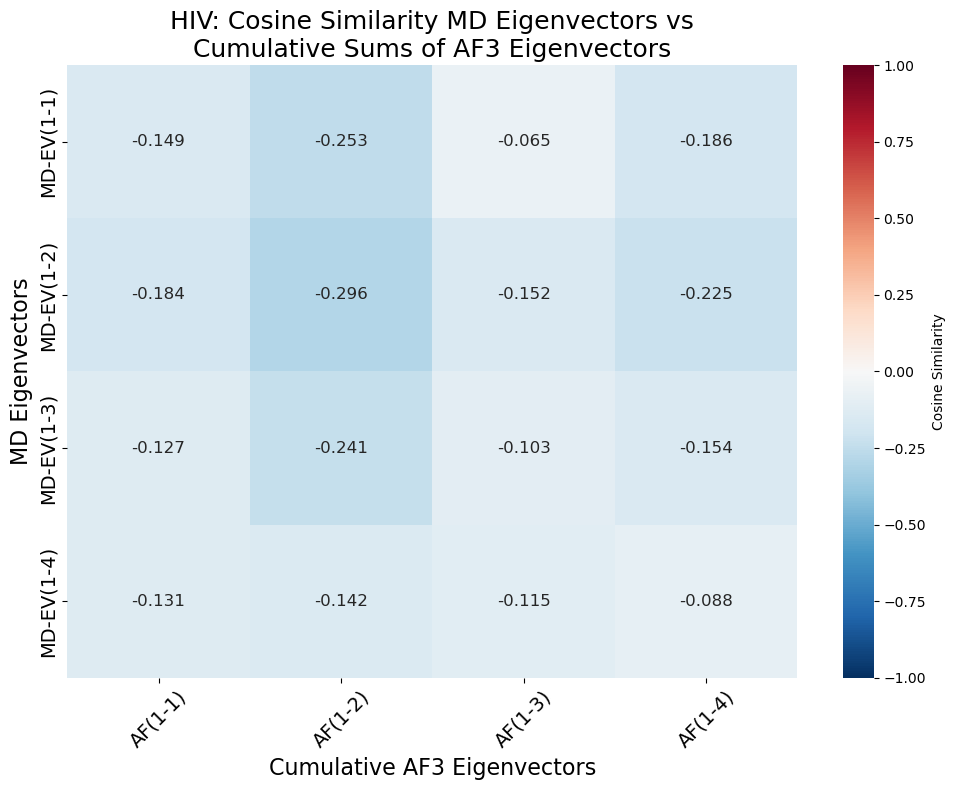


=== HIV CUMULATIVE SIMILARITY ANALYSIS ===
Maximum similarity for each cumulative AF combination:
  AF(1-1): -0.184 (with MD-EV2)
  AF(1-2): -0.296 (with MD-EV2)
  AF(1-3): -0.152 (with MD-EV2)
  AF(1-4): -0.225 (with MD-EV2)

Similarity progression for MD-EV1:
  MD-EV1 vs AF(1-1): -0.149
  MD-EV1 vs AF(1-2): -0.253
  MD-EV1 vs AF(1-3): -0.065
  MD-EV1 vs AF(1-4): -0.186

Best cumulative combination overall: AF(1-2)
Mean absolute similarity: 0.233


In [16]:
# HIV Target: Calculate cosine similarity with cumulative sums of AF3 eigenvectors
print("\n" + "="*60)
print("HIV TARGET ANALYSIS")
print("="*60)

# Load HIV data
print("Loading HIV data...")
try:
    hiv_md_ev = load_eigenvectors_properly('hiv_md_run1_final_eigen.txt')
    hiv_af_ev = load_eigenvectors_properly('hiv_af_eigen.txt')
    
    if hiv_md_ev is not None and hiv_af_ev is not None:
        print("=== CUMULATIVE AF3 EIGENVECTOR ANALYSIS (HIV) ===")
        print(f"HIV MD Run shape: {hiv_md_ev.shape}")
        print(f"HIV AlphaFold shape: {hiv_af_ev.shape}")
        
        # Number of MD eigenvectors to compare (up to 15)
        n_evs_md = min(hiv_md_ev.shape[1], 4)
        # Number of AF eigenvectors to cumulatively sum (up to 5)
        max_cumulative_evs = min(hiv_af_ev.shape[1], 4)
        
        print(f"Comparing {n_evs_md} MD eigenvectors vs cumulative sums of first {max_cumulative_evs} AF eigenvectors")
        
        # Calculate cumulative sums and similarities
        cumulative_similarities_hiv = np.zeros((n_evs_md, max_cumulative_evs))
        
        for cum_idx in range(max_cumulative_evs):
            # Create cumulative sum of AF eigenvectors (1, 1+2, 1+2+3, etc.)
            cumulative_af_ev = np.sum(hiv_af_ev[:, :cum_idx+1], axis=1)
            # Normalize the cumulative vector
            cumulative_af_ev = cumulative_af_ev / norm(cumulative_af_ev)
            
            print(f"\nCumulative sum of HIV AF EVs 1-{cum_idx+1}:")
            
            # Compare with each MD eigenvector
            for md_idx in range(n_evs_md):
                vec_md = np.sum(hiv_md_ev[:, :md_idx+1], axis=1)
                vec_md = vec_md / norm(vec_md)
                cos_sim_cum = dot(vec_md, cumulative_af_ev) / norm(vec_md)
                cumulative_similarities_hiv[md_idx, cum_idx] = cos_sim_cum
                
                if md_idx < 10:  # Print first 10 for readability
                    print(f"  MD-EV{md_idx+1} vs AF(1-{cum_idx+1}): {cos_sim_cum:.3f}")
        
        # Create heatmap for cumulative similarities
        plt.figure(figsize=(10, 8))
        
        cumulative_labels = [f'AF(1-{i+1})' for i in range(max_cumulative_evs)]
        md_labels = [f'MD-EV(1-{i+1})' for i in range(n_evs_md)]
        
        sns.heatmap(cumulative_similarities_hiv, 
                    annot=True, 
                    fmt='.3f', 
                    cmap='RdBu_r', 
                    center=0,
                    vmin=-1, 
                    vmax=1,
                    xticklabels=cumulative_labels,
                    yticklabels=md_labels,
                    cbar_kws={'label': 'Cosine Similarity'},
                    annot_kws={'size': 12})
        
        plt.title('HIV: Cosine Similarity MD Eigenvectors vs\nCumulative Sums of AF3 Eigenvectors', fontsize=18)
        plt.xlabel('Cumulative AF3 Eigenvectors', fontsize=16)
        plt.ylabel('MD Eigenvectors', fontsize=16)
        plt.xticks(fontsize=14, rotation=45)
        plt.yticks(fontsize=14)
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print(f"\n=== HIV CUMULATIVE SIMILARITY ANALYSIS ===")
        print("Maximum similarity for each cumulative AF combination:")
        for cum_idx in range(max_cumulative_evs):
            max_sim = np.max(np.abs(cumulative_similarities_hiv[:, cum_idx]))
            best_md_idx = np.argmax(np.abs(cumulative_similarities_hiv[:, cum_idx]))
            print(f"  AF(1-{cum_idx+1}): {cumulative_similarities_hiv[best_md_idx, cum_idx]:.3f} (with MD-EV{best_md_idx+1})")
        
        print(f"\nSimilarity progression for MD-EV1:")
        for cum_idx in range(max_cumulative_evs):
            print(f"  MD-EV1 vs AF(1-{cum_idx+1}): {cumulative_similarities_hiv[0, cum_idx]:.3f}")
        
        # Show which cumulative combination gives best overall similarity
        mean_abs_similarities = np.mean(np.abs(cumulative_similarities_hiv), axis=0)
        best_cumulative_idx = np.argmax(mean_abs_similarities)
        print(f"\nBest cumulative combination overall: AF(1-{best_cumulative_idx+1})")
        print(f"Mean absolute similarity: {mean_abs_similarities[best_cumulative_idx]:.3f}")
        
    else:
        print("Could not load HIV eigenvector data for cumulative analysis")
        
except Exception as e:
    print(f"Error loading HIV data: {e}")


LIPASE TARGET ANALYSIS
Loading LIPASE data...
Data rows per eigenvector chunk: 286
Total lines: 2870
Chunk size (including header): 287
Number of chunks: 10
Loading chunk 1: PC1 atom displacements (eigenvalue=273.0444472153698) total=642.4094602171064:
Loading chunk 2: PC2 atom displacements (eigenvalue=63.850298531328214) total=642.4094602171064:
Loading chunk 3: PC3 atom displacements (eigenvalue=41.500925090711775) total=642.4094602171064:
Loading chunk 4: PC4 atom displacements (eigenvalue=30.020916768166025) total=642.4094602171064:
Loading chunk 5: PC5 atom displacements (eigenvalue=22.842468148376554) total=642.4094602171064:
Loading chunk 6: PC6 atom displacements (eigenvalue=17.946272021349206) total=642.4094602171064:
Loading chunk 7: PC7 atom displacements (eigenvalue=12.571414064213506) total=642.4094602171064:
Loading chunk 8: PC8 atom displacements (eigenvalue=11.27483870191239) total=642.4094602171064:
Loading chunk 9: PC9 atom displacements (eigenvalue=9.94728800696935

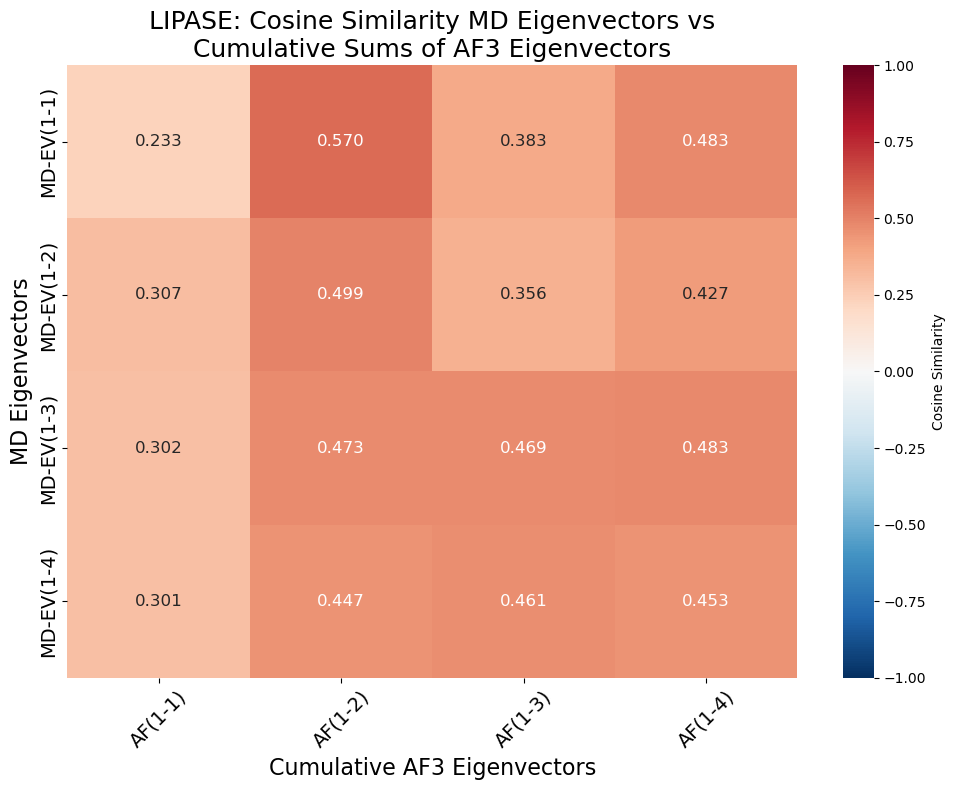


=== LIPASE CUMULATIVE SIMILARITY ANALYSIS ===
Maximum similarity for each cumulative AF combination:
  AF(1-1): 0.307 (with MD-EV2)
  AF(1-2): 0.570 (with MD-EV1)
  AF(1-3): 0.469 (with MD-EV3)
  AF(1-4): 0.483 (with MD-EV3)

Similarity progression for MD-EV1:
  MD-EV1 vs AF(1-1): 0.233
  MD-EV1 vs AF(1-2): 0.570
  MD-EV1 vs AF(1-3): 0.383
  MD-EV1 vs AF(1-4): 0.483

Best cumulative combination overall: AF(1-2)
Mean absolute similarity: 0.497


In [18]:
# LIPASE Target: Calculate cosine similarity with cumulative sums of AF3 eigenvectors
print("\n" + "="*60)
print("LIPASE TARGET ANALYSIS")
print("="*60)

# Load LIPASE data
print("Loading LIPASE data...")
try:
    lipa_md_ev = load_eigenvectors_properly('lipa_md_run1_final_eigen.txt')
    lipa_af_ev = load_eigenvectors_properly('lipa_af_eigen.txt')
    
    if lipa_md_ev is not None and lipa_af_ev is not None:
        print("=== CUMULATIVE AF3 EIGENVECTOR ANALYSIS (LIPASE) ===")
        print(f"LIPASE MD Run shape: {lipa_md_ev.shape}")
        print(f"LIPASE AlphaFold shape: {lipa_af_ev.shape}")
        
        # Number of MD eigenvectors to compare (up to 15)
        n_evs_md = min(lipa_md_ev.shape[1], 4)
        # Number of AF eigenvectors to cumulatively sum (up to 5)
        max_cumulative_evs = min(lipa_af_ev.shape[1], 4)
        
        print(f"Comparing {n_evs_md} MD eigenvectors vs cumulative sums of first {max_cumulative_evs} AF eigenvectors")
        
        # Calculate cumulative sums and similarities
        cumulative_similarities_lipa = np.zeros((n_evs_md, max_cumulative_evs))
        
        for cum_idx in range(max_cumulative_evs):
            # Create cumulative sum of AF eigenvectors (1, 1+2, 1+2+3, etc.)
            cumulative_af_ev = np.sum(lipa_af_ev[:, :cum_idx+1], axis=1)
            # Normalize the cumulative vector
            cumulative_af_ev = cumulative_af_ev / norm(cumulative_af_ev)
            
            print(f"\nCumulative sum of LIPASE AF EVs 1-{cum_idx+1}:")
            
            # Compare with each MD eigenvector
            for md_idx in range(n_evs_md):
                vec_md = np.sum(lipa_md_ev[:, :md_idx+1], axis=1)
                vec_md = vec_md / norm(vec_md)
                cos_sim_cum = dot(vec_md, cumulative_af_ev) / norm(vec_md)
                cumulative_similarities_lipa[md_idx, cum_idx] = cos_sim_cum
                
                if md_idx < 10:  # Print first 10 for readability
                    print(f"  MD-EV{md_idx+1} vs AF(1-{cum_idx+1}): {cos_sim_cum:.3f}")
        
        # Create heatmap for cumulative similarities
        plt.figure(figsize=(10, 8))
        
        cumulative_labels = [f'AF(1-{i+1})' for i in range(max_cumulative_evs)]
        md_labels = [f'MD-EV(1-{i+1})' for i in range(n_evs_md)]
        
        sns.heatmap(cumulative_similarities_lipa, 
                    annot=True, 
                    fmt='.3f', 
                    cmap='RdBu_r', 
                    center=0,
                    vmin=-1, 
                    vmax=1,
                    xticklabels=cumulative_labels,
                    yticklabels=md_labels,
                    cbar_kws={'label': 'Cosine Similarity'},
                    annot_kws={'size': 12})
        
        plt.title('LIPASE: Cosine Similarity MD Eigenvectors vs\nCumulative Sums of AF3 Eigenvectors', fontsize=18)
        plt.xlabel('Cumulative AF3 Eigenvectors', fontsize=16)
        plt.ylabel('MD Eigenvectors', fontsize=16)
        plt.xticks(fontsize=14, rotation=45)
        plt.yticks(fontsize=14)
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print(f"\n=== LIPASE CUMULATIVE SIMILARITY ANALYSIS ===")
        print("Maximum similarity for each cumulative AF combination:")
        for cum_idx in range(max_cumulative_evs):
            max_sim = np.max(np.abs(cumulative_similarities_lipa[:, cum_idx]))
            best_md_idx = np.argmax(np.abs(cumulative_similarities_lipa[:, cum_idx]))
            print(f"  AF(1-{cum_idx+1}): {cumulative_similarities_lipa[best_md_idx, cum_idx]:.3f} (with MD-EV{best_md_idx+1})")
        
        print(f"\nSimilarity progression for MD-EV1:")
        for cum_idx in range(max_cumulative_evs):
            print(f"  MD-EV1 vs AF(1-{cum_idx+1}): {cumulative_similarities_lipa[0, cum_idx]:.3f}")
        
        # Show which cumulative combination gives best overall similarity
        mean_abs_similarities = np.mean(np.abs(cumulative_similarities_lipa), axis=0)
        best_cumulative_idx = np.argmax(mean_abs_similarities)
        print(f"\nBest cumulative combination overall: AF(1-{best_cumulative_idx+1})")
        print(f"Mean absolute similarity: {mean_abs_similarities[best_cumulative_idx]:.3f}")
        
    else:
        print("Could not load LIPASE eigenvector data for cumulative analysis")
        
except Exception as e:
    print(f"Error loading LIPASE data: {e}")

Loading Onconase data...
Data rows per eigenvector chunk: 105
Total lines: 1060
Chunk size (including header): 106
Number of chunks: 10
Loading chunk 1: PC1 atom displacements (eigenvalue=13.69515460304921) total=76.76633475931808:
Loading chunk 2: PC2 atom displacements (eigenvalue=9.56978534377621) total=76.76633475931808:
Loading chunk 3: PC3 atom displacements (eigenvalue=7.516208735467246) total=76.76633475931808:
Loading chunk 4: PC4 atom displacements (eigenvalue=4.538725120444433) total=76.76633475931808:
Loading chunk 5: PC5 atom displacements (eigenvalue=3.809694222631691) total=76.76633475931808:
Loading chunk 6: PC6 atom displacements (eigenvalue=3.127930518659185) total=76.76633475931808:
Loading chunk 7: PC7 atom displacements (eigenvalue=2.2624353677824462) total=76.76633475931808:
Loading chunk 8: PC8 atom displacements (eigenvalue=1.8840140586457987) total=76.76633475931808:
Loading chunk 9: PC9 atom displacements (eigenvalue=1.8429119141588532) total=76.76633475931808

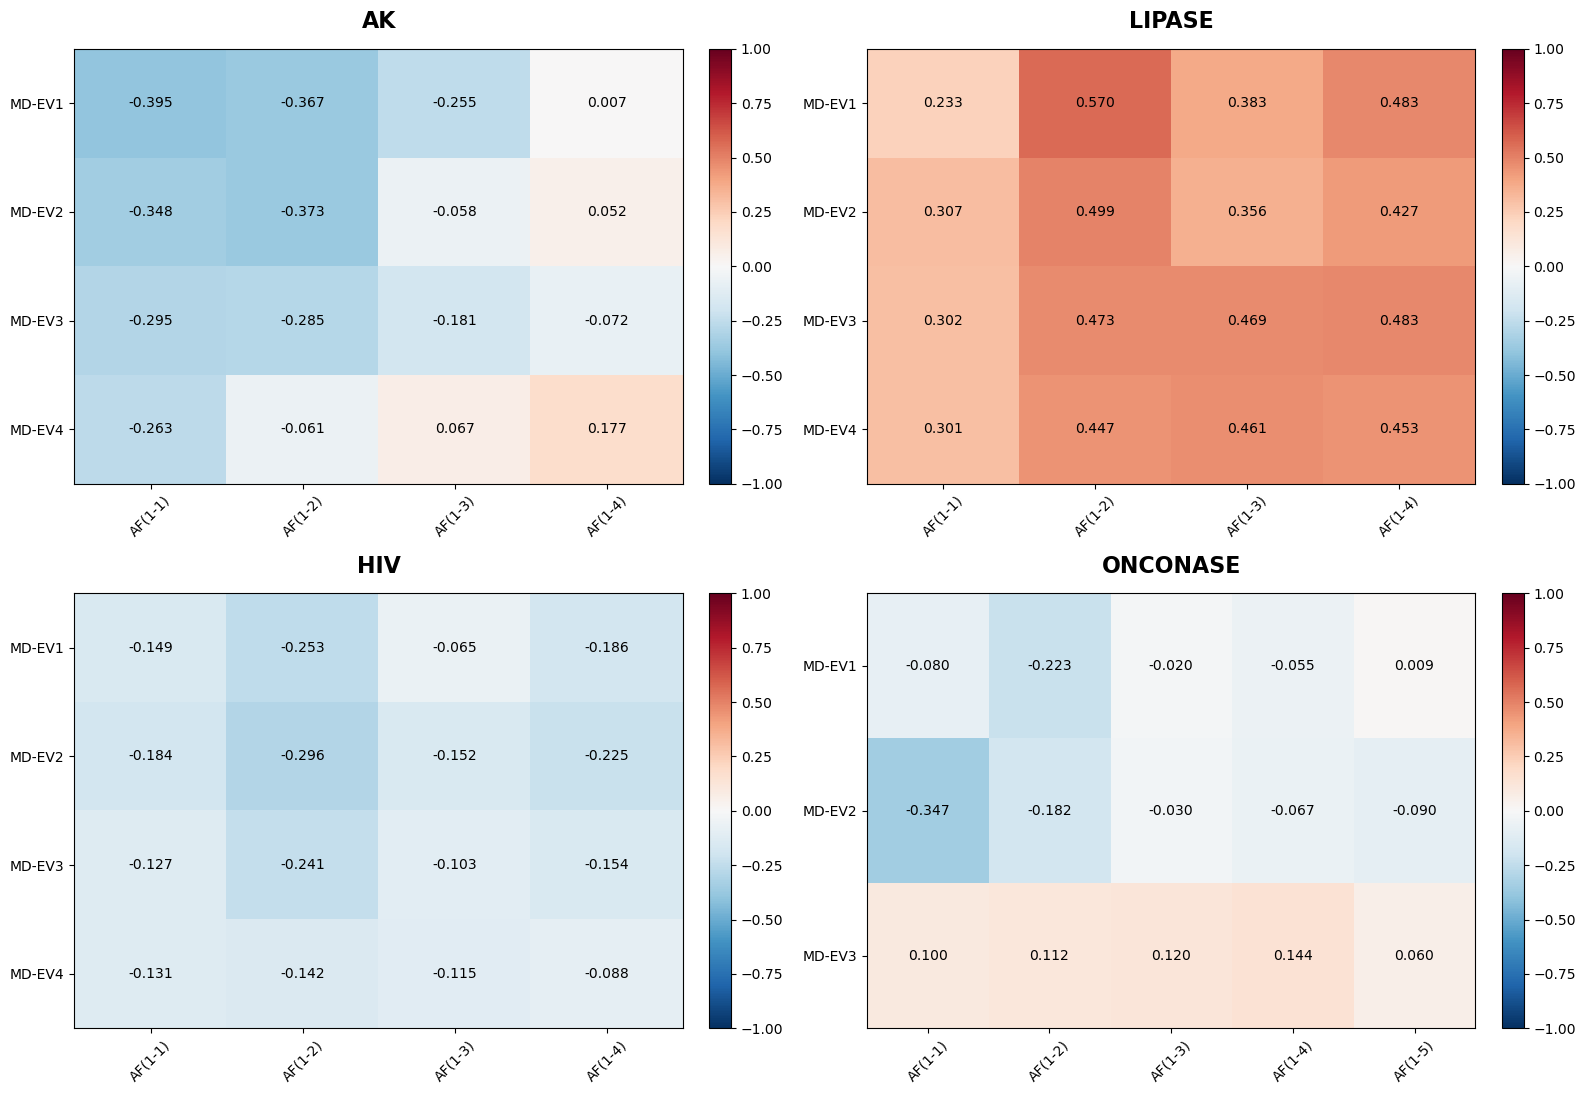


SUMMARY: CUMULATIVE SIMILARITY ANALYSIS FOR ALL TARGETS

AK Results:
  Maximum |similarity| for each cumulative AF combination:
    AF(1-1): -0.395 (with MD-EV1)
    AF(1-2): -0.373 (with MD-EV2)
    AF(1-3): -0.255 (with MD-EV1)
    AF(1-4): 0.177 (with MD-EV4)
  Best cumulative combination: AF(1-1)
  Mean absolute similarity: 0.325

LIPASE Results:
  Maximum |similarity| for each cumulative AF combination:
    AF(1-1): 0.307 (with MD-EV2)
    AF(1-2): 0.570 (with MD-EV1)
    AF(1-3): 0.469 (with MD-EV3)
    AF(1-4): 0.483 (with MD-EV3)
  Best cumulative combination: AF(1-2)
  Mean absolute similarity: 0.497

HIV Results:
  Maximum |similarity| for each cumulative AF combination:
    AF(1-1): -0.184 (with MD-EV2)
    AF(1-2): -0.296 (with MD-EV2)
    AF(1-3): -0.152 (with MD-EV2)
    AF(1-4): -0.225 (with MD-EV2)
  Best cumulative combination: AF(1-2)
  Mean absolute similarity: 0.233

ONCONASE Results:
  Maximum |similarity| for each cumulative AF combination:
    AF(1-1): -0.347 (w

In [19]:
# Create 2x2 panel figure with cumulative similarity heatmaps for all targets
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Define targets and their positions
targets = ['AK', 'LIPASE', 'HIV', 'ONCONASE']
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Load Onconase data if not already loaded
try:
    if True:
        print("Loading Onconase data...")
        onc_md_ev = load_eigenvectors_properly('onc_md_run1_final_eigen.txt')
        onc_af_ev = load_eigenvectors_properly('onc_af_eigen.txt')
        
        # Calculate cumulative similarities for Onconase
        if onc_md_ev is not None and onc_af_ev is not None:
            print("Calculating Onconase cumulative similarities...")
            n_evs_md = min(onc_md_ev.shape[1], 4)  # Only first 3 EVs for Onconase
            max_cumulative_evs = min(onc_af_ev.shape[1], 5)
            
            cumulative_similarities_onc = np.zeros((n_evs_md, max_cumulative_evs))
            
            for cum_idx in range(max_cumulative_evs):
                cumulative_af_ev = np.sum(onc_af_ev[:, :cum_idx+1], axis=1)
                cumulative_af_ev = cumulative_af_ev / norm(cumulative_af_ev)
                
                for md_idx in range(n_evs_md):
                    vec_md = np.sum(onc_md_ev[:, :md_idx+1], axis=1)
                    vec_md = vec_md / norm(vec_md)
                    cos_sim_cum = dot(vec_md, cumulative_af_ev) / norm(vec_md)
                    cumulative_similarities_onc[md_idx, cum_idx] = cos_sim_cum
        else:
            cumulative_similarities_onc = None
except Exception as e:
    print(f"Could not load Onconase data: {e}")
    onc_md_ev = None
    onc_af_ev = None
    cumulative_similarities_onc = None

# Define data dictionaries for each target (using existing data from previous cells)
target_data = {
    'AK': {
        'similarities': cumulative_similarities if 'cumulative_similarities' in locals() else None,
        'md_ev': md_run1_ev if 'md_run1_ev' in locals() else None,
        'af_ev': af_ev if 'af_ev' in locals() else None
    },
    'HIV': {
        'similarities': cumulative_similarities_hiv if 'cumulative_similarities_hiv' in locals() else None,
        'md_ev': hiv_md_ev if 'hiv_md_ev' in locals() else None,
        'af_ev': hiv_af_ev if 'hiv_af_ev' in locals() else None
    },
    'LIPASE': {
        'similarities': cumulative_similarities_lipa if 'cumulative_similarities_lipa' in locals() else None,
        'md_ev': lipa_md_ev if 'lipa_md_ev' in locals() else None,
        'af_ev': lipa_af_ev if 'lipa_af_ev' in locals() else None
    },
    'ONCONASE': {
        'similarities': None,  # Force recalculation with 3 EVs
        'md_ev': onc_md_ev if 'onc_md_ev' in locals() else None,
        'af_ev': onc_af_ev if 'onc_af_ev' in locals() else None
    }
}

# Function to calculate cumulative similarities if needed
def calculate_cumulative_similarities(md_ev, af_ev, max_cumulative_evs=5, target_name=None):
    if md_ev is None or af_ev is None:
        return None
    
    # Special case for Onconase - only use first 3 EVs
    if target_name == 'ONCONASE':
        n_evs_md = min(md_ev.shape[1], 3)
    else:
        n_evs_md = min(md_ev.shape[1], 15)
    max_cumulative_evs = min(af_ev.shape[1], max_cumulative_evs)
    
    cumulative_similarities = np.zeros((n_evs_md, max_cumulative_evs))
    
    for cum_idx in range(max_cumulative_evs):
        # Create cumulative sum of AF eigenvectors
        cumulative_af_ev = np.sum(af_ev[:, :cum_idx+1], axis=1)
        cumulative_af_ev = cumulative_af_ev / norm(cumulative_af_ev)
        
        for md_idx in range(n_evs_md):
            vec_md = md_ev[:, md_idx]
            cos_sim_cum = dot(vec_md, cumulative_af_ev) / norm(vec_md)
            cumulative_similarities[md_idx, cum_idx] = cos_sim_cum
    
    return cumulative_similarities

# Plot data for each target
for i, (target, pos) in enumerate(zip(targets, positions)):
    ax = axes[pos]
    data = target_data[target]
    print(target_data['ONCONASE'])
    
    # Get or calculate similarities
    similarities = data['similarities']
    if similarities is None and data['md_ev'] is not None and data['af_ev'] is not None:
        similarities = calculate_cumulative_similarities(data['md_ev'], data['af_ev'], target_name=target)
    
    if similarities is not None:
        # Create labels
        max_cumulative_evs = similarities.shape[1]
        n_evs_md = similarities.shape[0]
        
        cumulative_labels = [f'AF(1-{i+1})' for i in range(max_cumulative_evs)]
        md_labels = [f'MD-EV{i+1}' for i in range(n_evs_md)]
        
        # Create heatmap
        im = ax.imshow(similarities, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
        
        # Add annotations
        for md_idx in range(n_evs_md):
            for cum_idx in range(max_cumulative_evs):
                text = ax.text(cum_idx, md_idx, f'{similarities[md_idx, cum_idx]:.3f}',
                             ha="center", va="center", color="black", fontsize=10)
        
        # Set labels and ticks
        ax.set_xticks(range(max_cumulative_evs))
        ax.set_xticklabels(cumulative_labels, fontsize=10, rotation=45)
        ax.set_yticks(range(n_evs_md))
        ax.set_yticklabels(md_labels, fontsize=10)
        
        # Add colorbar only for the first plot
        cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    else:
        # Handle missing data
        ax.text(0.5, 0.5, f'Data not available\nfor {target}', 
                ha='center', va='center', fontsize=14, 
                transform=ax.transAxes, alpha=0.7)
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Customize subplot
    ax.set_title(f'{target}', fontsize=16, fontweight='bold', pad=15)


# No need to handle empty subplot anymore - all positions filled with data


# Adjust layout and save
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('./dcumulative_evs_similarity_2x2.pdf', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

# Print summary statistics for all targets
print("\n" + "="*80)
print("SUMMARY: CUMULATIVE SIMILARITY ANALYSIS FOR ALL TARGETS")
print("="*80)

for target in targets:
    data = target_data[target]
    similarities = data['similarities']
    
    if similarities is None and data['md_ev'] is not None and data['af_ev'] is not None:
        similarities = calculate_cumulative_similarities(data['md_ev'], data['af_ev'], target_name=target)
    
    if similarities is not None:
        print(f"\n{target} Results:")
        max_cumulative_evs = similarities.shape[1]
        
        # Best similarity for each cumulative combination
        print("  Maximum |similarity| for each cumulative AF combination:")
        for cum_idx in range(max_cumulative_evs):
            max_sim = np.max(np.abs(similarities[:, cum_idx]))
            best_md_idx = np.argmax(np.abs(similarities[:, cum_idx]))
            print(f"    AF(1-{cum_idx+1}): {similarities[best_md_idx, cum_idx]:.3f} (with MD-EV{best_md_idx+1})")
        
        # Overall best combination
        mean_abs_similarities = np.mean(np.abs(similarities), axis=0)
        best_cumulative_idx = np.argmax(mean_abs_similarities)
        print(f"  Best cumulative combination: AF(1-{best_cumulative_idx+1})")
        print(f"  Mean absolute similarity: {mean_abs_similarities[best_cumulative_idx]:.3f}")
    else:
        print(f"\n{target}: Data not available")
